#                                        # CAPSTONE PROJECT
                                        ' CRIMES IN INDIA"
                    

#DATA LINKS FROM VARIOUS SOURCES.

1	Crime in India 
Context
This dataset contains complete information about various aspects of crimes happened in India from 2001. There are many factors that can be analysed from this dataset. Hope this dataset helps us to understand better about India.

Inspiration:
There could be many things one can understand by analyzing this dataset. Few inspirations for you to start with.
1.	What is the major reason people being kidnapped in each and every state?
2.	Offenders relation to the rape victim
3.	Juveniles family background, education and economic setup.
4.	Which state has more crime against children and women?
5.	Age group wise murder victim
6.	Crime by place of occurrence.
7.	Anti corruption cases vs arrests.
8.	Which state has more number of complaints against police?
9.	Which state is the safest for foreigners?


Dataset available
One can find dataset on  (from any website you can pick any crime dataset and analyse the above list given aspects.)

https://www.kaggle.com/rajanand/crime-in-india
https://rajanand.atlassian.net/wiki/spaces/DATASET/pages/1310740/Crime+in+India
 https://data.gov.in/catalog/casespersons-held-under-crime-against-women
http://archive.ics.uci.edu/ml/datasets/communities+and+crime





In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
#LETS START BY EXPLORING DIFFERENT DATASETS ON DIFFERENT CRIMES IN INDIA  ONE BY ONE

#VARIOUS FILES:

victims = pd.read_csv('../input/crime-in-india/20_Victims_of_rape.csv')
police_hr = pd.read_csv('../input/crime-in-india/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('../input/crime-in-india/30_Auto_theft.csv')
prop_theft = pd.read_csv('../input/crime-in-india/10_Property_stolen_and_recovered.csv')
women =  pd.read_csv("43_Arrests_under_crime_against_women.csv")
custodial_death= pd.read-csv("40_05_Custodial_death_others.csv")
hospitalization= pd.read_csv("40_04_Custodial_death_during_hospitalization_or_treatment.csv")
production= pd.read_csv("40_03_Custodial_death_during_production.csv")
victim_sex=pd.read_csv("33_CH_not_murder_victim_age_sex.csv")

In [3]:
df_victim=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/20_Victims_of_rape.csv")

In [4]:
df_victim

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [5]:
df_victim.columns

Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [6]:
df_victim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [7]:
df_victim.isin(['/','-','?',' ']).sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

# There are no null values ,hence it can be further compared and visualised
# observation:
1.there are 11 columns and 1050 rows.
2. We have 2 featues which are object type and 9 integer type.


In [8]:
df_victim.groupby(['Year'])['Rape_Cases_Reported'].sum()
#grouping by the particular column

Year
2001    32150
2002    32746
2003    31694
2004    36466
2005    36718
2006    38696
2007    41474
2008    42934
2009    42794
2010    44344
Name: Rape_Cases_Reported, dtype: int64

In [9]:
rape_victims= df_victim[df_victim['Subgroup']=='Victims of Incest Rape']


In [10]:
rape_victims

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1036,West Bengal,2006,Victims of Incest Rape,6,0,0,0,6,0,6,0
1039,West Bengal,2007,Victims of Incest Rape,114,0,2,3,81,25,114,3
1042,West Bengal,2008,Victims of Incest Rape,9,0,2,1,1,0,9,5
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0


In [14]:
rape_victims.groupby(['Year'])['Rape_Cases_Reported'].sum()

Year
2001    439
2002    369
2003    399
2004    505
2005    750
2006    431
2007    405
2008    309
2009    321
2010    288
Name: Rape_Cases_Reported, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'show'

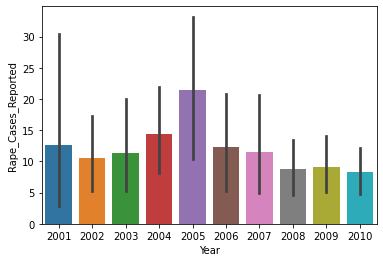

In [15]:
fig= sns.barplot(x='Year',y='Rape_Cases_Reported',data=rape_victims)
fig.show()

observation:
1. the no of rape cases increased by 2005..and ih that particular it became acommon scene
2.The rate of cases declined after that,there can be many reasons such as more police intervention,strict laws,and enforcement of laws.
3. with more media intervention and highlights of such cases,these cases have shown some decliment and were min by2010, eventhough alot need to be done yet.

In [34]:
g=pd.DataFrame(rape_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())

In [36]:
g

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


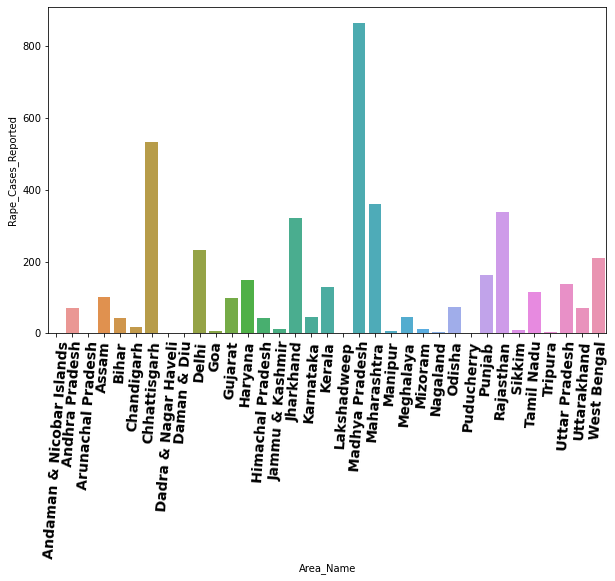

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(x='Area_Name',y='Rape_Cases_Reported',data=g)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()

OBSERVAIONS:
1.MAX CASES WERE REPORTED FROM MADHYA PRADESH, FOLLOWED BY CHHASTIGARH,MAHARASHTRA, RAJASTHAN ,JHARKHAND,WEST BENGAL.
2.STATES WERE LESS NUMBER OF ASSAM,ANDHRA PRADESH,GUJARAT,HARYANA,UP,UTTARAKHAND,PUNJAB
3.SUPRISINLY ,THERE ARE STATES LIKE NAGALAND,TRIPURA(NORTH EASTERN STATES)AND UT LIKE(DAMAN AND DIU,DAAGR AND NAGAR HAVELLI) , IN WHICH WE HAVE ZERO RAPE CASES REPORTED.THERE CAN BE SENSIBLE REASONS FOR IT.

In [37]:
above_50 = rape_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = rape_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = rape_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = rape_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = rape_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = rape_victims['Victims_Upto_10_Yrs'].sum()

In [42]:
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]
age_group_vals

[239, 513, 1042, 1882, 517, 26]

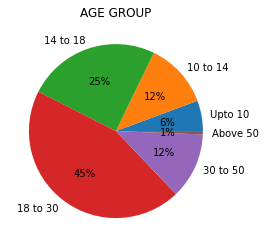

In [49]:
age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

plt.pie(age_group_vals, labels=age_grp, autopct='%.0f%%')
plt.title("AGE GROUP")

# displaying chart
plt.show()


In [ ]:
OBSERVATIONS:
1. THE MAX VICTIMS FALL UNDER THE AGE GROUP OF 18-30(WHICH IS MOSTLY YOUNGSTERS,STUDYING OR WORKING) WHICH IS NEARLY HALF OF THE TOTAL CASES REPORTED IN THE SPAN OF 10 YEARS.
2.AGE GROUP 14-18 CASES ARE THE ONE FOURTH OF THE TOATL CASS REPORTED.
3.20% OF THE TOTAL CASES  ARE REPORTED FOR AGE GROUP30-50 AND 10-14 EQUALLY.
4.NOTICEABLLY THERE ARE NEXT TO NO CASES REPORTED IN THE AGE GROUP ABOVE 50, AND NEGGLIGIBLE CASES UPTO 10.
5.

In [ ]:
#uploading more data of crimes from github.. HUMAN RIGHTS VIOLATION DATA SET

In [56]:
df_humanrights=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/35_Human_rights_violation_by_police.csv")

In [58]:
df_humanrights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Area_Name                                       2267 non-null   object 
 1   Year                                            2267 non-null   int64  
 2   Group_Name                                      2267 non-null   object 
 3   Sub_Group_Name                                  2267 non-null   object 
 4   Cases_Registered_under_Human_Rights_Violations  2265 non-null   float64
 5   Policemen_Chargesheeted                         2213 non-null   float64
 6   Policemen_Convicted                             2163 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 124.1+ KB


In [78]:
df_humanrights

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2262,Meghalaya,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2263,Nagaland,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),0.0,0.0,0.0
2264,Odisha,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),5.0,1.0,0.0
2265,Uttar Pradesh,2010,HR_Total Violations by Police,12. Total (Sum of 1-11 Above),6.0,5.0,0.0


# GROUPING THE COLUMNS AND CONVERTING IT INTO DATAFRAME FOR URTHUR ANALYSIS

In [61]:
g1=pd.DataFrame(df_humanrights.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())

In [64]:
g1

,Area_Name,Cases_Registered_under_Human_Rights_Violations
0,Andhra Pradesh,226.0
1,Arunachal Pradesh,40.0
2,Assam,302.0
3,Bihar,52.0
4,Chandigarh,2.0
5,Chhattisgarh,624.0
6,Daman & Diu,0.0
7,Delhi,24.0
8,Goa,6.0
9,Gujarat,226.0


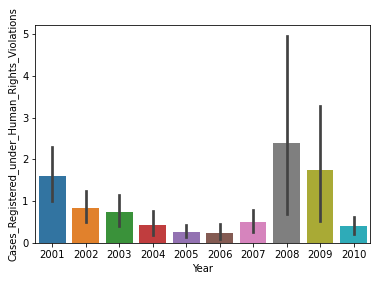

In [75]:
fig= sns.barplot(x='Year',y='Cases_Registered_under_Human_Rights_Violations',data=df_humanrights)


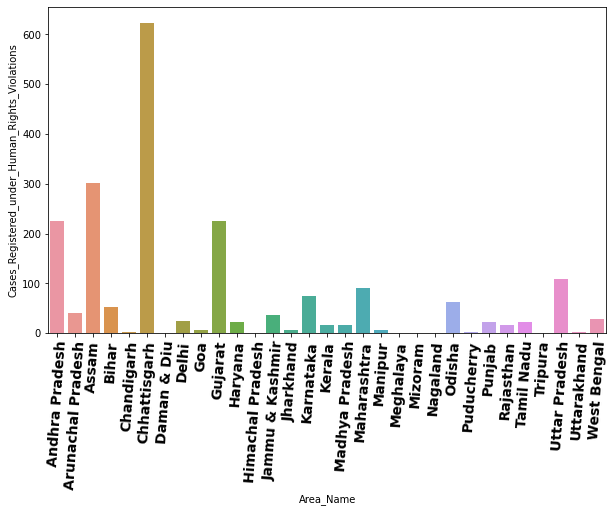

In [77]:
plt.figure(figsize = (10,6))
sns.barplot(x='Area_Name',y='Cases_Registered_under_Human_Rights_Violations',data=g1)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()

# OBSERVATIONS:
1. MAX CASES UNDER HUMAN RIGHT VIOLATION WAS REGISTERED IN 2008,FOLLOWED BY 2009.
2. SUPRISINGLY 2002----2007 ,THERE WERE COMPARATIVELY VERY FEW CASES WERE REGISTERD OVERALL ,THE REASON COULD BE CHANGE OF GOVT AND OFFICAIL IN THE DEPARTMENT.\
3. FEWER CASES WAS REGISTERED IN NORTH INDIAN STATES, WHEREAS CHATTISGARH REPOERTED THE MAX NO OF CASES REGISTERED,HENCE SHOWS PEOPE ARE MORE AWARE AND ALERT THERE.
4. EVEN FOR STATES LIKE ASSAM, GUJARAT.LAW ENFORCEMENT RULES ARE EXECUTED IN PIORITY BASIS, ANS IMMEDIATED ACTION IS TAKEN IN. REGISTERING COMPLAINENTS.
5. IMPORTANT OBSERVATION IS   THAT UT LIKE DAMAN AND DIU, CHANDIGARH, HAVE HARDLY ANY CASES TO REGISTER., ALSO STATES OF MEGHALAYA AND MIZORAM HAVE INSIGINCANT CAESES REPORTED.

In [86]:
g2=pd.DataFrame(df_humanrights.Group_Name.value_counts().reset_index())

In [87]:
g2

,index,Group_Name
0,HR_Total Violations by Police,214
1,HR_Others Violations by Police,194
2,HR_Disappearance of Persons,190
3,HR_Extortion,190
4,HR_Torture,190
5,HR_Atrocities on SC/ST,188
6,HR_Illegal detention/arrests,186
7,HR_Fake encounter killings,185
8,HR_Indignity to Women,185
9,HR_Violation against Terrorists/Extremists,182


In [89]:
g3=pd.DataFrame(df_humanrights.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())


In [90]:
g3

,Year,Policemen_Chargesheeted,Policemen_Convicted
0,2001,270.0,4.0
1,2002,118.0,0.0
2,2003,46.0,20.0
3,2004,44.0,0.0
4,2005,42.0,0.0
5,2006,56.0,0.0
6,2007,74.0,0.0
7,2008,28.0,16.0
8,2009,166.0,116.0
9,2010,28.0,8.0


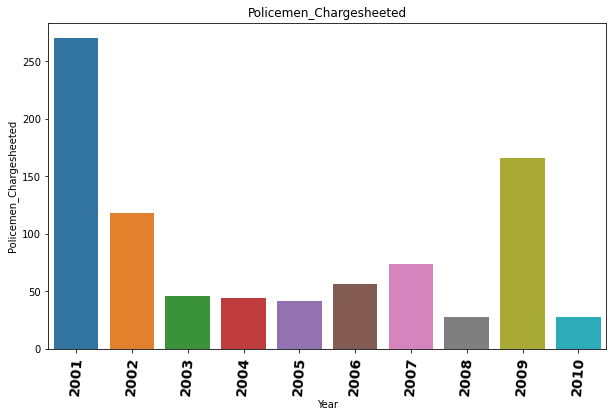

In [92]:
year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

plt.figure(figsize = (10,6))
sns.barplot(x='Year',y='Policemen_Chargesheeted',data=g3)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.title('Policemen_Chargesheeted')
plt.show()

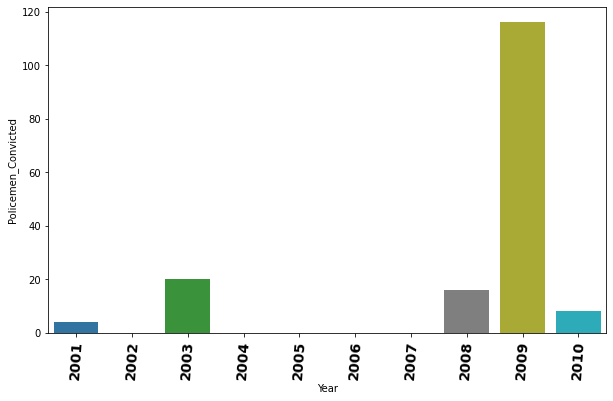

In [94]:
plt.figure(figsize = (10,6))
sns.barplot(x='Year',y='Policemen_Convicted',data=g3)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()

OBSERAVTIONS:
1.Policemen_Chargesheeted	HAS SHOWN DECLINE AFTER 2001, AND ONLY IN 2009 , SIGNFICANT CASES COULD BE SEEN.
2.WHEREAS ONLY IN 2009 CONVICTED POLICEMEN NUMBER REFLECTS TO BE HIGHEST COUNTS.SHOWS THAT  CORRRECT TIMELY ACTION WERE TAKEN.

#DATASET O TRIAL ON VIOLENT CRIMES BY COURTS::::

In [96]:
df1=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/28_Trial_of_violent_crimes_by_courts.csv")

In [97]:
df1

,Area_Name,Year,Group_Name,Sub_Group_Name,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_By_trial,Trial_of_Violent_Crimes_by_Courts_Total
0,Andhra Pradesh,2001,TVC- Arson,10. Arson,20.0,517.0,537.0
1,Arunachal Pradesh,2001,TVC- Arson,10. Arson,0.0,3.0,3.0
2,Assam,2001,TVC- Arson,10. Arson,5.0,142.0,147.0
3,Bihar,2001,TVC- Arson,10. Arson,0.0,208.0,208.0
4,Chandigarh,2001,TVC- Arson,10. Arson,0.0,3.0,3.0
...,...,...,...,...,...,...,...
4468,Tamil Nadu,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),69.0,6773.0,6842.0
4469,Tripura,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),6.0,401.0,407.0
4470,Uttar Pradesh,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),0.0,23364.0,23364.0
4471,Uttarakhand,2010,TVC- Total,12. Total Trials (Sum of 1-11 Above),NaN,1036.0,1036.0


In [165]:
g5=pd.DataFrame(df1.groupby(['Year'])['Trial_of_Violent_Crimes_by_Courts_By_Confession','Trial_of_Violent_Crimes_by_Courts_Total'].sum().reset_index())

In [166]:
g5

,Year,Trial_of_Violent_Crimes_by_Courts_By_Confession,Trial_of_Violent_Crimes_by_Courts_Total
0,2001,5741.0,297405.0
1,2002,7712.0,318015.0
2,2003,2966.0,305832.0
3,2004,2923.0,308312.0
4,2005,3988.0,306067.0
5,2006,4326.0,312948.0
6,2007,3307.0,292086.0
7,2008,4502.0,290659.0
8,2009,4518.0,258850.0
9,2010,4335.0,299892.0


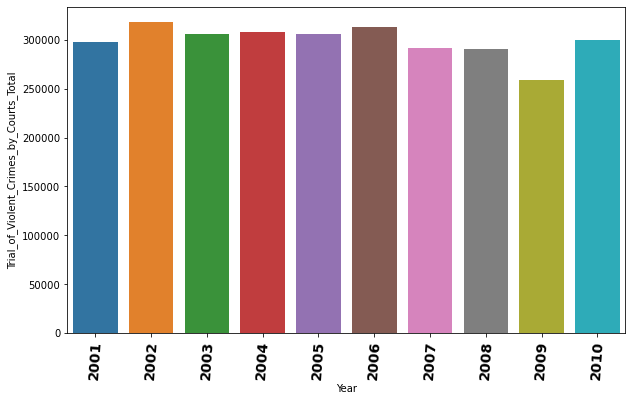

In [179]:
plt.figure(figsize = (10,6))
sns.barplot(x='Year',y='Trial_of_Violent_Crimes_by_Courts_Total',data=g5)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()




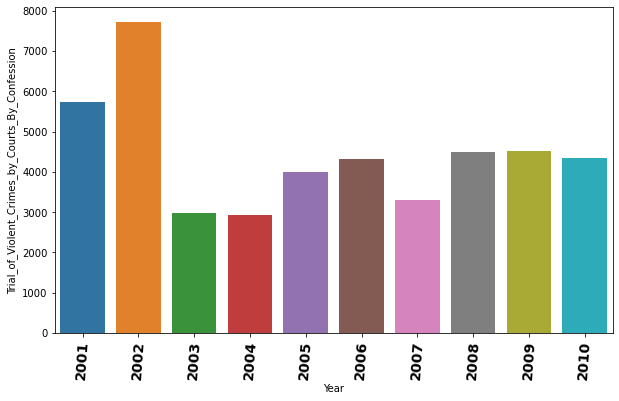

In [180]:
plt.figure(figsize = (10,6))
sns.barplot(x='Year',y='Trial_of_Violent_Crimes_by_Courts_By_Confession',data=g5)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()


OBSERVATIONS:
    1.TRIAL ON CASES BY CONFESSION WAS MAX IN 2002, AND DECLINED THEREAFTER TO HALF ITS COUNT, SETTLETING AT A SIMILAR NUMBER IN 2008-2010.
    2.NOTICALLY 2002, IS A VERY CRUICAL YEAR ,AS IT HAS MAX TRIALS AND DECISION BY COURT TAKEN . 
    

In [98]:
df2=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/29_Period_of_trials_by_courts.csv")

In [99]:
df2

,Area_Name,Year,Group_Name,Sub_Group_Name,PT_1_3_Years,PT_3_5_Years,PT_5_10_Years,PT_6_12_Months,PT_Less_than_6_Months,PT_Over_10_Years,PT_Total
0,Andhra Pradesh,2004,PT1. District/Session Judge,1. District/Session Judge,1931.0,805.0,196.0,293.0,44.0,57.0,3326.0
1,Arunachal Pradesh,2004,PT1. District/Session Judge,1. District/Session Judge,13.0,6.0,0.0,5.0,0.0,0.0,24.0
2,Assam,2004,PT1. District/Session Judge,1. District/Session Judge,582.0,444.0,170.0,127.0,69.0,22.0,1414.0
3,Bihar,2004,PT1. District/Session Judge,1. District/Session Judge,297.0,590.0,594.0,11.0,0.0,233.0,1725.0
4,Chhattisgarh,2004,PT1. District/Session Judge,1. District/Session Judge,239.0,171.0,72.0,222.0,271.0,17.0,992.0
...,...,...,...,...,...,...,...,...,...,...,...
1781,Tamil Nadu,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),31670.0,17929.0,6337.0,35894.0,27894.0,854.0,120578.0
1782,Tripura,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),969.0,467.0,94.0,512.0,422.0,14.0,2478.0
1783,Uttar Pradesh,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),36712.0,52137.0,21241.0,3389.0,599.0,4923.0,119001.0
1784,Uttarakhand,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),1932.0,955.0,298.0,1158.0,326.0,52.0,4721.0


In [181]:
#GROUPING  THREE COLUMNS AND AMKING DATAFRAME
g4=pd.DataFrame(df2.groupby(['Area_Name','Year'])['PT_Total'].sum().reset_index())


In [131]:
val=['Area_Name','Year','PT_Total']

In [129]:
g4

,Area_Name,Year,PT_Total
0,Andaman & Nicobar Islands,2004,588.0
1,Andaman & Nicobar Islands,2005,198.0
2,Andaman & Nicobar Islands,2006,410.0
3,Andaman & Nicobar Islands,2007,524.0
4,Andaman & Nicobar Islands,2008,460.0
...,...,...,...
240,West Bengal,2006,71508.0
241,West Bengal,2007,46772.0
242,West Bengal,2008,68036.0
243,West Bengal,2009,47516.0


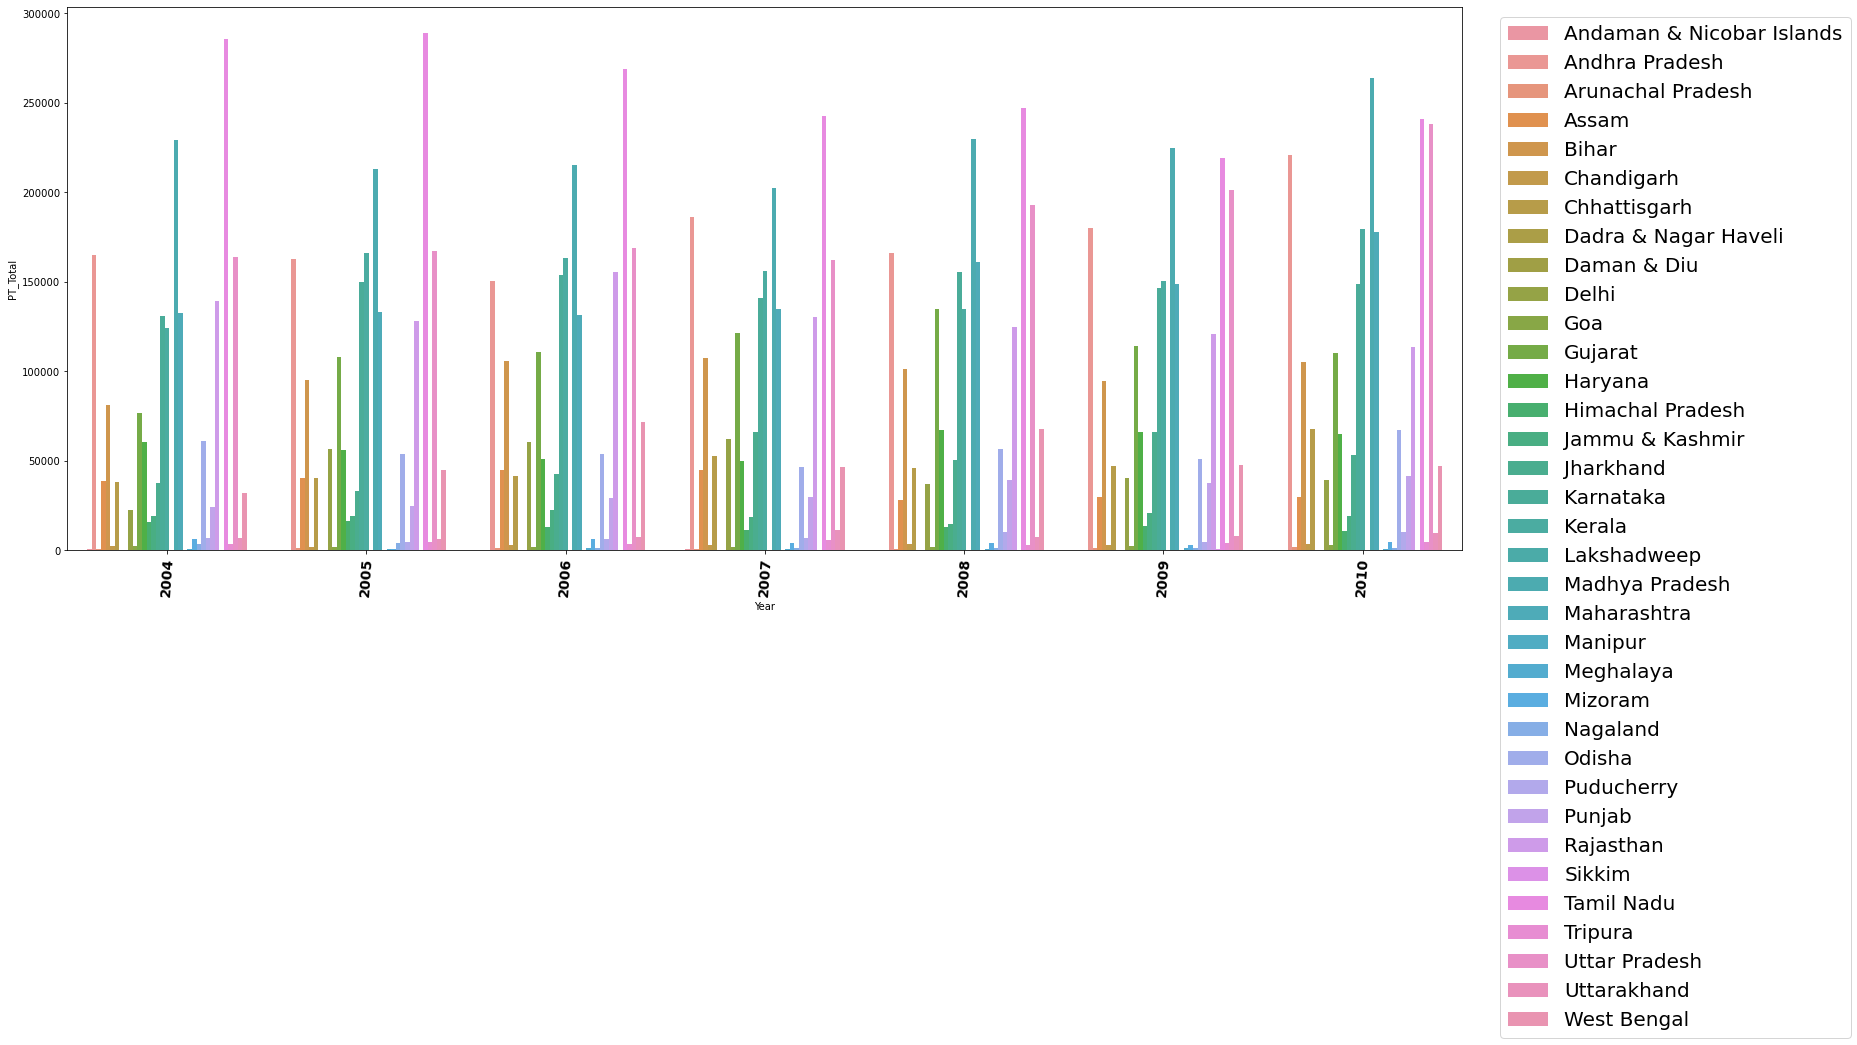

In [163]:
Year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

plt.figure(figsize = (25,10))
ax=sns.barplot(x='Year',y='PT_Total',hue='Area_Name', data=g4)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.legend(bbox_to_anchor=(1.02, 1),fontsize=20, loc='upper left')

plt.show()


#OBSERVATIONS:
1. MAX POLICE TRIAL CASES,WERE I THE STATES OF TRIPURA,UP,FOLLOWED BY MAHARASTRA ,MADHYA PRADESH,ALSO IN A AND NI ISLANDS.
2. OVERALL THERE IS AN INCLINATION IN THE POLICAL TRAIL IN VARIOUS CASES, FROM 2004-2010.
3. However ,there are still states where the number of  trials cases are very less and insignificant. 

#### 

In [184]:
peroid=['PT_1_3_Years','PT_3_5_Years','PT_5_10_Years','PT_6_12_Months','PT_Less_than_6_Months','PT_Over_10_Years']

PT_1_3_Years = df2['PT_1_3_Years'].sum()
PT_3_5_Years = df2['PT_3_5_Years'].sum()
PT_5_10_Years = df2['PT_5_10_Years'].sum()
PT_6_12_Months = df2['PT_6_12_Months'].sum()
PT_Less_than_6_Months = df2['PT_Less_than_6_Months'].sum()
PT_Over_10_Years = df2['PT_Over_10_Years'].sum()

P_T= [PT_1_3_Years,PT_3_5_Years,PT_5_10_Years,PT_6_12_Months,PT_Less_than_6_Months,PT_Over_10_Years]



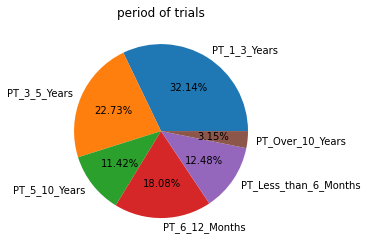

In [193]:
plt.pie(P_T,labels=peroid, autopct='%.02f%%')
plt.title("period of trials")

# displaying chart
plt.show()


#observatons:
1. The total trial period  for most of the cases is around  1 to 3 years, followed by 22.73% of trial peroids is 3 to 5 years.
2.   AROUND 18 % of cases are trailed  peroids of 6-12 months and aorund 14% cases fall under the category of of trail
     period of 5 years and above over 10 years.
3. Less complicated cases or normal cases may less time ,whereas few cases with voilent crimes and  murder cases may take longer time than expected.

In [195]:
#downloading auto theft dataset
auto_theft=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/30_Auto_theft.csv")

In [196]:
auto_theft

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946
...,...,...,...,...,...,...,...
1860,Tamil Nadu,2010,AT6-Total,6. Total (Sum of 1-5 Above),2563.0,3541.0,5205
1861,Tripura,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,26.0,50
1862,Uttar Pradesh,2010,AT6-Total,6. Total (Sum of 1-5 Above),505.0,2434.0,16705
1863,Uttarakhand,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,244.0,853


In [197]:
#grouping and froming a dataframe
g6 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())

In [198]:
g6

,Area_Name,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,166
1,Andhra Pradesh,113618
2,Arunachal Pradesh,1658
3,Assam,22236
4,Bihar,45754
5,Chandigarh,14842
6,Chhattisgarh,33310
7,Dadra & Nagar Haveli,446
8,Daman & Diu,510
9,Delhi,197330


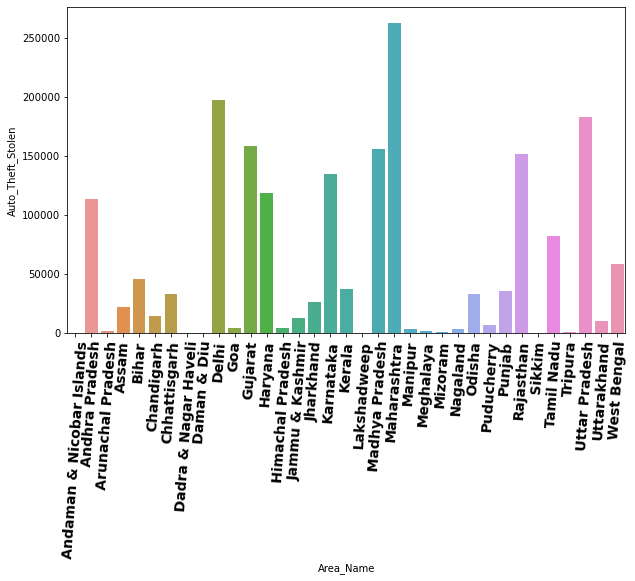

In [207]:
plt.figure(figsize = (10,6))
sns.barplot(x='Area_Name',y='Auto_Theft_Stolen',data=g6)
plt.xticks(fontsize=14,fontweight ='bold',rotation=86)
plt.show()

In [200]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

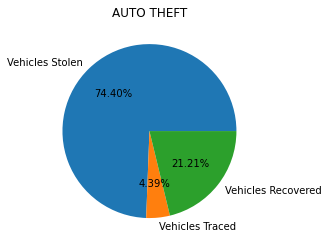

In [201]:
plt.pie(vehicle_vals,labels=vehicle_group,autopct='%.02f%%')
plt.title("AUTO THEFT")

# displaying chart
plt.show()

# Obseravtions:
1.States of northern belt has inceased umber of auto theft, maharashtra, delhi ,up,gujarat, rajasthan. This may be because strict action are not taken and apportriate steps are not taken in curbing these crimes,
2.UT and northen eastern states still have very neglebile auto theft cases,owing to better law enfrocement and timely intervation by the concerned department.
3Having a closer look in th epie chart,in comparision to around 75% stolen vhicles, onlu a fraction was traced and around only 21% was recovered.

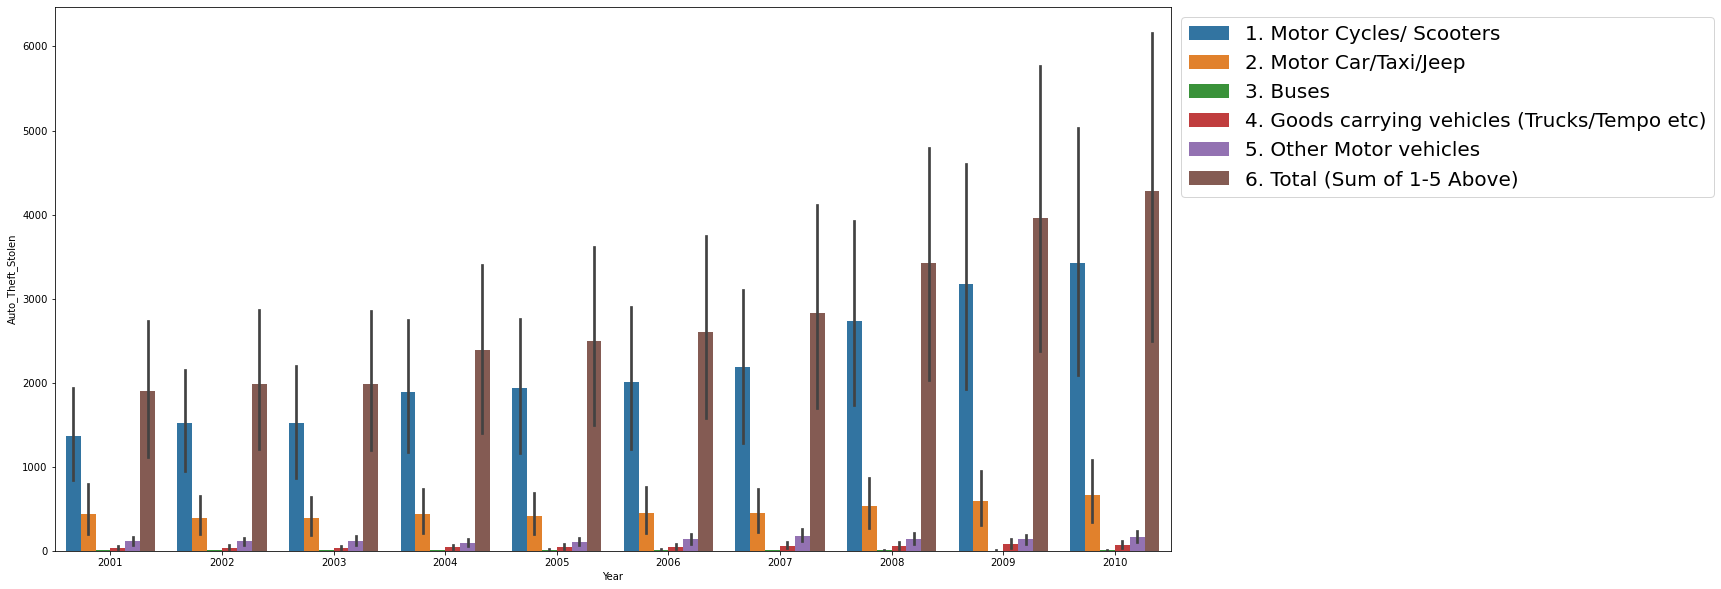

In [360]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year',y='Auto_Theft_Stolen',hue="Sub_Group_Name",data=auto_theft)
plt.legend(bbox_to_anchor=(1, 1),fontsize=20, loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


comment:
    1. Most of the vehicles stolen are two wheeler category ,motor cycle /scooters. and rest are the sum of other caterogies of vehicles.and each year the numbers are multipying.
    2.the other vehicle like car taxi, zeep, has also shown a grudual incresae in stolen numbers.
    

#  Custodial death dataset downloaded:

In [337]:

cust_1=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/40_01_Custodial_death_person_remanded.csv")
cust_2=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/40_02_Custodial_death_person_not_remanded.csv")
cust_3=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/40_03_Custodial_death_during_production.csv")
cust_4=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/40_04_Custodial_death_during_hospitalization_or_treatment.csv")
cust_5=pd.read_csv(r"https://raw.githubusercontent.com/Jassi987/capstone-files/main/40_05_Custodial_death_others.csv")



In [338]:
df_cust.isnull().sum()

Area_Name_left                                                 0
Year                                                           0
Group_Name_left                                                0
Sub_Group_Name_left                                            0
CD_Deaths_Reported_left                                        0
CD_No_of_Autopsy_conducted_left                                0
CD_No_of_Cases_registered_in_connection_with_deaths_left       0
CD_No_of_Judicial_enquiry_orderedconducted_left                0
CD_No_of_Magisterial_enquiry_orderedconducted_left             0
CD_No_of_Policemen_Charge_sheeted_left                         0
CD_No_of_Policemen_Convicted_left                              0
Area_Name_right                                                0
Group_Name_right                                               0
Sub_Group_Name_right                                           0
CD_Deaths_Reported_right                                       0
CD_No_of_Autopsy_conducte

In [339]:
cust_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Area_Name                                            211 non-null    object 
 1   Year                                                 211 non-null    int64  
 2   Group_Name                                           211 non-null    object 
 3   Sub_Group_Name                                       211 non-null    object 
 4   CD_Deaths_Reported                                   210 non-null    float64
 5   CD_No_of_Autopsy_conducted                           202 non-null    float64
 6   CD_No_of_Cases_registered_in_connection_with_deaths  195 non-null    float64
 7   CD_No_of_Judicial_enquiry_orderedconducted           186 non-null    float64
 8   CD_No_of_Magisterial_enquiry_orderedconducted        205 non-null    f

In [340]:
df_cust.isin([' ','NAN','-']).sum().any()

False

In [342]:
#creating Dtaframe
cust_1=pd.DataFrame(cust_1)
cust_2=pd.DataFrame(cust_2)

In [343]:
# Mergering dataset cust_1 and cust_2 for itd analysis

df_cust=pd.merge(cust_1,cust_2, how='right' ,on = 'Year', suffixes = ('_left','_right'))

In [344]:
# filling the null values withe mode as it is discreet data
df_cust['CD_Deaths_Reported_left'].fillna(df_cust['CD_Deaths_Reported_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Autopsy_conducted_left'].fillna(df_cust['CD_No_of_Autopsy_conducted_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Cases_registered_in_connection_with_deaths_left'].fillna(df_cust['CD_No_of_Cases_registered_in_connection_with_deaths_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Judicial_enquiry_orderedconducted_left'].fillna(df_cust['CD_No_of_Judicial_enquiry_orderedconducted_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Magisterial_enquiry_orderedconducted_left'].fillna(df_cust['CD_No_of_Magisterial_enquiry_orderedconducted_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Policemen_Charge_sheeted_left'].fillna(df_cust['CD_No_of_Policemen_Charge_sheeted_left'].mode()[0],inplace=True)
df_cust['CD_No_of_Policemen_Convicted_left '].fillna(df_cust['CD_No_of_Policemen_Convicted_left '].mode()[0],inplace=True)

#calculating sum of each mentioned columns for further analysis
CD_Deaths_Reported_left = df_cust['CD_Deaths_Reported_left'].sum()
CD_No_of_Autopsy_conducted_left= df_cust['CD_No_of_Autopsy_conducted_left'].sum()
CD_No_of_Cases_registered_in_connection_with_deaths_left= df_cust['CD_No_of_Cases_registered_in_connection_with_deaths_left'].sum()
CD_No_of_Judicial_enquiry_orderedconducted_left= df_cust['CD_No_of_Judicial_enquiry_orderedconducted_left'].sum()
CD_No_of_Magisterial_enquiry_orderedconducted_left= df_cust['CD_No_of_Magisterial_enquiry_orderedconducted_left'].sum()
CD_No_of_Policemen_Charge_sheeted_left = df_cust['CD_No_of_Policemen_Charge_sheeted_left'].sum()
CD_No_of_Policemen_Convicted_left =df_cust['CD_No_of_Policemen_Convicted_left'].sum()

Remanded_list=['CD_Deaths_Reported_left',
               'CD_No_of_Autopsy_conducted_left',
               'CD_No_of_Cases_registered_in_connection_with_deaths_left',
               'CD_No_of_Judicial_enquiry_orderedconducted_left',
               'CD_No_of_Magisterial_enquiry_orderedconducted_left',
               'CD_No_of_Policemen_Charge_sheeted_left',
               'CD_No_of_Policemen_Convicted_left']
Remanded_values=[CD_Deaths_Reported_left,
                 CD_No_of_Autopsy_conducted_left,
                 CD_No_of_Cases_registered_in_connection_with_deaths_left,
                CD_No_of_Judicial_enquiry_orderedconducted_left,
                CD_No_of_Magisterial_enquiry_orderedconducted_left,
                 CD_No_of_Policemen_Charge_sheeted_left,
                 CD_No_of_Policemen_Convicted_left
                ]

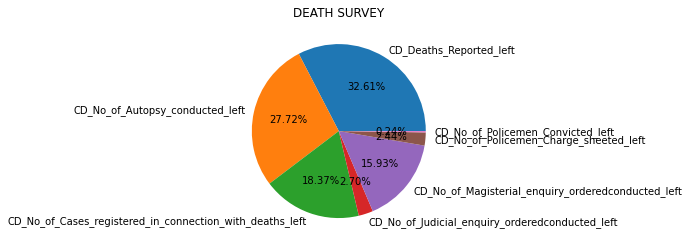

In [355]:
#pie plot for dealth survey analysis
plt.pie(Remanded_values,labels=Remanded_list,autopct='%.02f%%')
plt.title("DEATH SURVEY")


# displaying chart
plt.show()

# Obsevations:
1.around 30%c death cases were reported out of which 27% autopsy was conducted.
2.only 18% death related cases were registered
3.Out of the reported cases , 15% caes were such in which magisterial enquiry was conducted.and 2% judicial enquiry was conducted.
4.for the repoted cases. only a fractio of 2%policemen was charged and negilicable per of these were convicted of the charges.

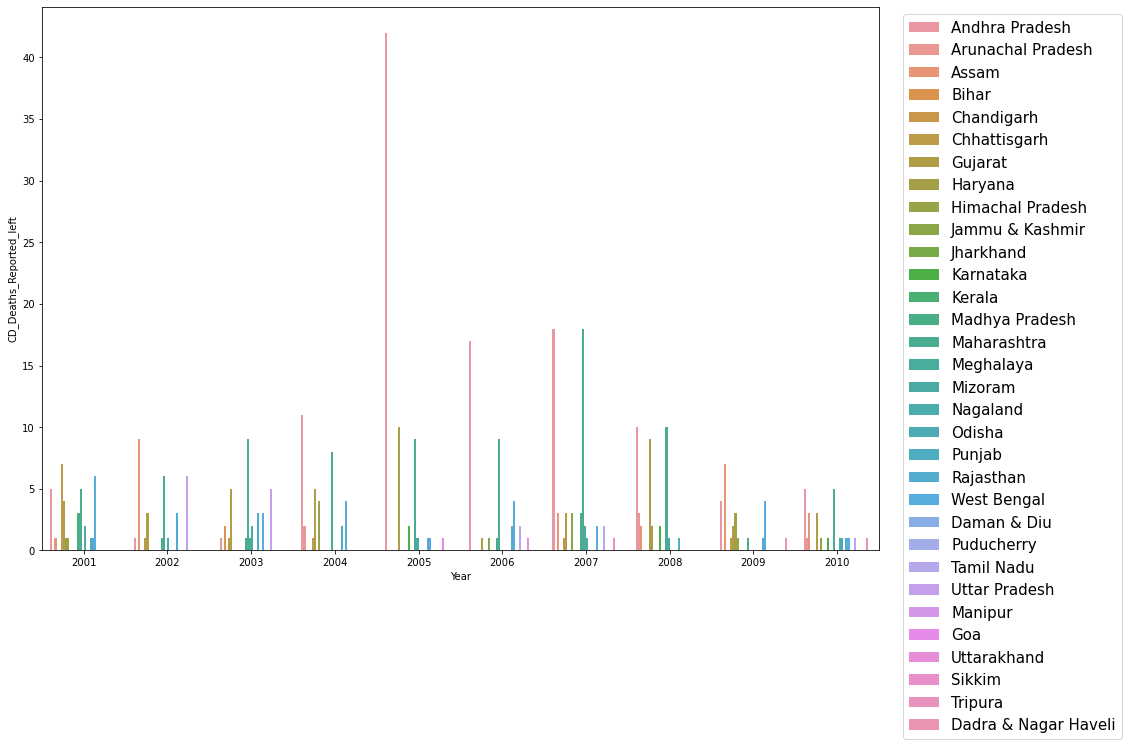

In [271]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='CD_Deaths_Reported_left',hue='Area_Name_left',data=df_cust)
plt.legend(bbox_to_anchor=(1.02, 1),fontsize=15, loc='upper left')

plt.show()


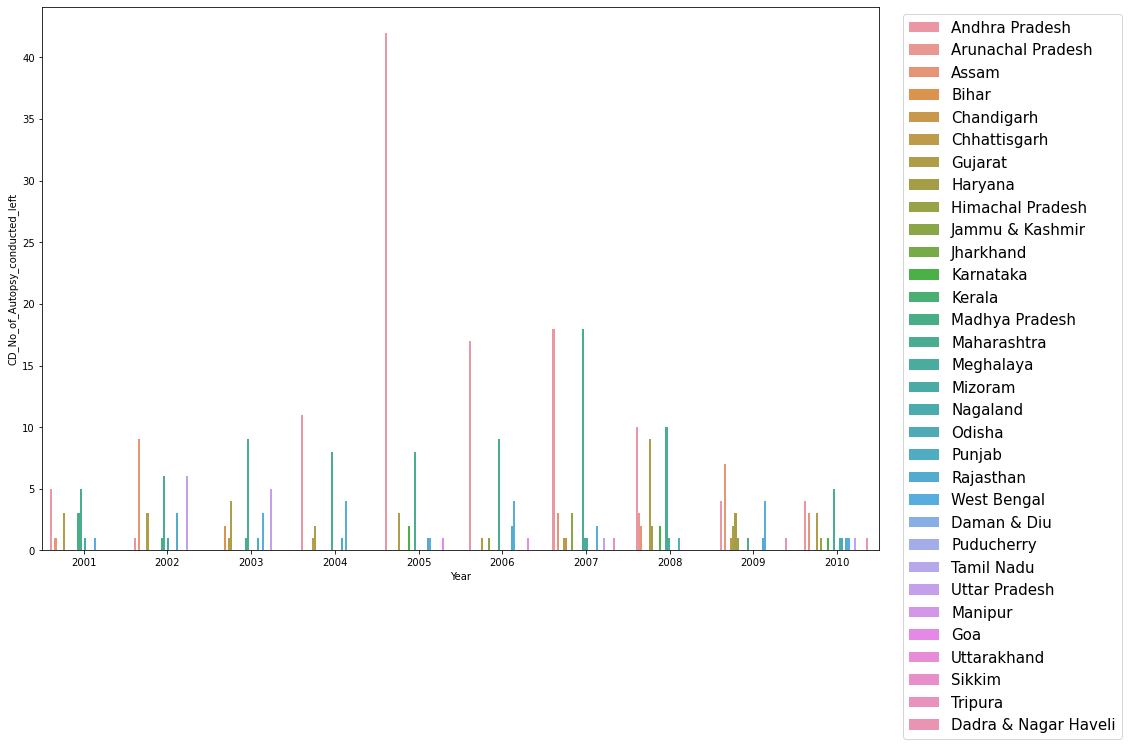

In [280]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='CD_No_of_Autopsy_conducted_left',hue='Area_Name_left',data=df_cust)
plt.legend(bbox_to_anchor=(1.02, 1),fontsize=15, loc='upper left')

plt.show()


# PHASE 3


SQL QUERY

Note: Create a separate table for each file and give a meaningful name.



When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table



3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year



In [483]:
import sqlite3
import csv
import sqlite3
#importing sqlite
db= sqlite3.connect('crime.db')

In [484]:
db

In [485]:
#declare cursor
cursor=db.cursor()

In [505]:
url=pd.read_csv("/Users/amandeepsingh/Downloads/India_Crime - Copy/42_District_wise_crimes_committed_against_women_2001_2012.csv")

In [1077]:
url

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [492]:
#creating table women_crime
cursor.execute("CREATE TABLE women_crime(state TEXT,distict TEXT,Year INT,Rape INT,Kidnapping  INT,Dowry Deaths INT,Assault_on_women INT,Insult INT,Cruelty INT,importation INT);")


OperationalError: table women_crime already exists

In [487]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))


Files in '/Users/amandeepsingh': ['RAINFALL.PREDICTION.ipynb', '.config', 'Music', 'titanic.project inter35-Copy1.ipynb', '.condarc', 'IBM_HR_Analytics_Final.pkl', 'Untitled1.ipynb', 'titanic.project inter35.ipynb', '.DS_Store', 'Customer_Churn_Final.pkl', '.CFUserTextEncoding', 'bin', '.xonshrc', 'regression_baseball.ipynb', 'Untitled.ipynb', '.zshrc', 'Pictures', 'Census Income Project.ipynb', 'Insurance_claims_Final.pkl', 'Regressionbaseball.ipynb', 'MacKeeper Backups', 'loan application.ipynb', 'Untitled2.ipynb', '.ipython', 'insurance claim fraud.ipynb', 'Desktop', 'Library', '.matplotlib', 'glass_identification.ipynb', 'crime.db', 'movies list.ipynb', 'selenium.1.ipynb', '.cups', '.bash_sessions', 'HR .ipynb', 'CUSTOMERCHURN .ipynb', 'globalpower.ipynb', 'crime.ipynb', 'Public', 'beautiful soup.ipynb', '.tcshrc', '.anaconda', 'Movies', 'Applications', 'world happiness project.ipynb', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', 'DS0722_jas4aman1947@yahoo.com_q1', '.an

In [512]:
#load data from file to table
#3.1 sql
with open('/Users/amandeepsingh/Downloads/India_Crime - Copy/42_District_wise_crimes_committed_against_women_2001_2012.csv' ,'r') as file:
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO women_crime VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records+=1
    
print("Number of records inserted", no_records)

Number of records inserted 9018


In [513]:
result=cursor.execute("SELECT * FROM women_crime")with open('/Users/amandeepsingh/Downloads/India_Crime - Copy/42_District_wise_crimes_committed_against_women_2001_2012.csv' ,'r') as file:
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO women_crime VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))
        db.commit()
        no_records+=1
    
print("Number of records inserted", no_records)
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"', '"Dowry Deaths"', '"Assault on women with intent to outrage her modesty"', '"Insult to modesty of Women"', '"Cruelty by Husband or his Relatives"', '"Importation of Girls"\n')
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 50, 30, 16, 149, 34, 175, 0)
('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001, 23, 30, 7, 118, 24, 154, 0)
('"ANDHRA PRADESH"', '"CHITTOOR"', 2001, 27, 34, 14, 112, 83, 186, 0)
('"ANDHRA PRADESH"', '"CUDDAPAH"', 2001, 20, 20, 17, 126, 38, 57, 0)
('"ANDHRA PRADESH"', '"EAST GODAVARI"', 2001, 23, 26, 12, 109, 58, 247, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0, 0, 1, 0, 0, 0)
('"ANDHRA PRADESH"', '"GUNTUR"', 2001, 54, 51, 7, 139, 129, 378, 0)
('"ANDHRA PRADESH"', '"HYDERABAD CITY"', 2001, 37, 39, 24, 118, 27, 746, 0)
('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2001, 56, 49, 62, 414, 81, 224, 0)
('"ANDHRA PRADESH"', '"KHAMMAM"', 2001, 47, 30, 17, 180, 336, 172, 0)
('"ANDHRA PRADESH"', '"KRISHNA"', 2001

In [539]:
#3.2 sql
result=cursor.execute('SELECT Rape FROM women_crime order by Rape and kidnapping Desc')
    

for row in result:
    print(row)    

(50,)
(23,)
(27,)
(20,)
(23,)
(54,)
(37,)
(56,)
(47,)
(37,)
(29,)
(59,)
(35,)
(35,)
(46,)
(21,)
(19,)
(72,)
(8,)
(25,)
(12,)
(13,)
(8,)
(53,)
(61,)
(871,)
(1,)
(2,)
(2,)
(2,)
(9,)
(5,)
(2,)
(4,)
(2,)
(2,)
(1,)
(33,)
(28,)
(20,)
(45,)
(48,)
(42,)
(43,)
(35,)
(35,)
(30,)
(37,)
(24,)
(42,)
(21,)
(5,)
(33,)
(14,)
(64,)
(23,)
(2,)
(51,)
(30,)
(47,)
(53,)
(41,)
(817,)
(93,)
(16,)
(25,)
(34,)
(13,)
(20,)
(10,)
(35,)
(22,)
(8,)
(19,)
(25,)
(13,)
(10,)
(6,)
(51,)
(5,)
(22,)
(10,)
(11,)
(13,)
(44,)
(11,)
(73,)
(2,)
(40,)
(7,)
(15,)
(27,)
(1,)
(39,)
(25,)
(12,)
(19,)
(20,)
(3,)
(11,)
(23,)
(4,)
(30,)
(20,)
(888,)
(17,)
(69,)
(19,)
(22,)
(144,)
(59,)
(29,)
(36,)
(42,)
(46,)
(34,)
(43,)
(53,)
(104,)
(58,)
(145,)
(959,)
(4,)
(8,)
(12,)
(39,)
(5,)
(1,)
(2,)
(3,)
(4,)
(9,)
(5,)
(4,)
(17,)
(20,)
(14,)
(11,)
(2,)
(4,)
(8,)
(2,)
(18,)
(5,)
(3,)
(6,)
(5,)
(20,)
(11,)
(26,)
(11,)
(3,)
(18,)
(9,)
(286,)
(11,)
(10,)
(37,)
(17,)
(32,)
(10,)
(21,)
(21,)
(16,)
(44,)
(31,)
(11,)
(6,)
(38,)
(11,)
(28,)
(17,)
(15,

In [550]:

    #3.2 sql
result=cursor.execute('SELECT state,distict,Year  FROM women_crime  order by Rape and kidnapping Desc')

for row in result:
    print(row) 

('"ANDHRA PRADESH"', '"ADILABAD"', 2001)
('"ANDHRA PRADESH"', '"ANANTAPUR"', 2001)
('"ANDHRA PRADESH"', '"CHITTOOR"', 2001)
('"ANDHRA PRADESH"', '"CUDDAPAH"', 2001)
('"ANDHRA PRADESH"', '"EAST GODAVARI"', 2001)
('"ANDHRA PRADESH"', '"GUNTUR"', 2001)
('"ANDHRA PRADESH"', '"HYDERABAD CITY"', 2001)
('"ANDHRA PRADESH"', '"KARIMNAGAR"', 2001)
('"ANDHRA PRADESH"', '"KHAMMAM"', 2001)
('"ANDHRA PRADESH"', '"KRISHNA"', 2001)
('"ANDHRA PRADESH"', '"KURNOOL"', 2001)
('"ANDHRA PRADESH"', '"MAHABOOBNAGAR"', 2001)
('"ANDHRA PRADESH"', '"MEDAK"', 2001)
('"ANDHRA PRADESH"', '"NALGONDA"', 2001)
('"ANDHRA PRADESH"', '"NELLORE"', 2001)
('"ANDHRA PRADESH"', '"NIZAMABAD"', 2001)
('"ANDHRA PRADESH"', '"PRAKASHAM"', 2001)
('"ANDHRA PRADESH"', '"RANGA REDDY"', 2001)
('"ANDHRA PRADESH"', '"SRIKAKULAM"', 2001)
('"ANDHRA PRADESH"', '"VIJAYAWADA"', 2001)
('"ANDHRA PRADESH"', '"VISAKHA RURAL"', 2001)
('"ANDHRA PRADESH"', '"VISAKHAPATNAM"', 2001)
('"ANDHRA PRADESH"', '"VIZIANAGARAM"', 2001)
('"ANDHRA PRADESH"', '"W

In [572]:
#3.2 sql
result=cursor.execute('SELECT MAX(state,distict,Year) FROM women_crime group by Rape and kidnapping')
for row in result:
    print(row) 


('"Year"',)
('"ANDHRA PRADESH"',)


In [554]:
#3.3 sql
result=cursor.execute('SELECT state,distict,Year  FROM women_crime  order by Rape and kidnapping Asc')

for row in result:
    print(row) 


('"STATE/UT"', '"DISTRICT"', '"Year"')
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001)
('"ANDHRA PRADESH"', '"SECUNDERABAD RLY."', 2001)
('"ANDHRA PRADESH"', '"VIJAYAWADA RLY."', 2001)
('"ARUNACHAL PRADESH"', '"KAMENG WEST"', 2001)
('"ARUNACHAL PRADESH"', '"TAWANG"', 2001)
('"ASSAM"', '"C.I.D."', 2001)
('"ASSAM"', '"G.R.P."', 2001)
('"ASSAM"', '"R.P.O."', 2001)
('"BIHAR"', '"ARWAL"', 2001)
('"BIHAR"', '"JAMALPUR RLY."', 2001)
('"BIHAR"', '"KATIHAR RLY."', 2001)
('"CHHATTISGARH"', '"BIZAPUR"', 2001)
('"CHHATTISGARH"', '"GRP RAIPUR"', 2001)
('"CHHATTISGARH"', '"KAWARDHA"', 2001)
('"GUJARAT"', '"W.RLY"', 2001)
('"HARYANA"', '"GRP"', 2001)
('"HIMACHAL PRADESH"', '"G.R.P."', 2001)
('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001)
('"JAMMU & KASHMIR"', '"CRIME SRINAGAR"', 2001)
('"JAMMU & KASHMIR"', '"KARGIL"', 2001)
('"JAMMU & KASHMIR"', '"LEH"', 2001)
('"JAMMU & KASHMIR"', '"RAILWAYS"', 2001)
('"JHARKHAND"', '"DEOGHAR"', 2001)
('"JHARKHAND"', '"DHANBAD RLY."', 2001)
('"JHARKHAND"', '"DUMKA"', 200

#3.4 sql


In [573]:
import csv
import sqlite3
#importing sqlite
db1= sqlite3.connect('02_District_wise_crimes_committed_against_ST_2001_2012.csv.db1')

In [574]:
db1

In [575]:
#declare cursor
cursor=db1.cursor()

In [576]:
#creating table st_crime
cursor.execute("CREATE TABLE st_crime(state TEXT,distict TEXT,Year INT ,murder INT,Rape INT,Kidnapping  INT,Dacoity INT,robbery INT,arson INT,hurt INT,pcr INT,poa INT,other crime INT);")


In [819]:
#load data from file to table via copy path #3.8
#for i in df.iterrows():
 #   print(i[0],i[1])    
    
with open('/Users/amandeepsingh/Downloads/India_Crime - Copy/02_District_wise_crimes_committed_against_ST_2001_2012.csv' ,'r') as file:
    no_records=0
    for i in df.iterrows():
        A=i[0]
        B=i[1]
        D=i[3]
        E=i[4]
        cursor.execute("INSERT INTO district_crime VALUES('A','B',D','E');")
        print(i)
      #  db.commit()
        no_records+=1
        
    
print("Number of records inserted", no_records)

IndexError: tuple index out of range

In [606]:
#3.5 sql
#3.5	Write SQL query to find the highest number of dacoity/robbery in which district.
result=cursor.execute('SELECT state ,MAX(dacoity) FROM st_crime group by state ORDER BY MAX(dacoity) DESC;')

for row in result:
    print(row) 


('"STATE/UT"', '"Dacoity"')
('"GUJARAT"', 29)
('"NAGALAND"', 13)
('"CHHATTISGARH"', 9)
('"JHARKHAND"', 5)
('"ASSAM"', 5)
('"MAHARASHTRA"', 4)
('"ODISHA"', 2)
('"MIZORAM"', 2)
('"MADHYA PRADESH"', 2)
('"KARNATAKA"', 2)
('"SIKKIM"', 1)
('"HIMACHAL PRADESH"', 1)
('"ARUNACHAL PRADESH"', 1)
('"WEST BENGAL"', 0)
('"UTTARAKHAND"', 0)
('"UTTAR PRADESH"', 0)
('"TRIPURA"', 0)
('"TAMIL NADU"', 0)
('"RAJASTHAN"', 0)
('"PUNJAB"', 0)
('"PUDUCHERRY"', 0)
('"MEGHALAYA"', 0)
('"MANIPUR"', 0)
('"LAKSHADWEEP"', 0)
('"KERALA"', 0)
('"JAMMU & KASHMIR"', 0)
('"HARYANA"', 0)
('"GOA"', 0)
('"DELHI"', 0)
('"DAMAN & DIU"', 0)
('"D & N HAVELI"', 0)
('"CHANDIGARH"', 0)
('"BIHAR"', 0)
('"ANDHRA PRADESH"', 0)
('"A & N ISLANDS"', 0)


In [697]:
# STATE WITH MIN DACOITY

result=cursor.execute('SELECT state ,MIN(dacoity) FROM st_crime ORDER BY MIN(dacoity) DESC;  ')

for row in result:
    print(row) 


OperationalError: no such table: st_crime

In [623]:
#3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

result=cursor.execute('SELECT distict, MIN(murder) FROM st_crime ORDER BY MIN(murder) DESC;')

for row in result:
    print(row) 


('"ADILABAD"', 0)


In [633]:
# 3.7 ---Write SQL query to find the number of murders in ascending order in district and yearwise.


result=cursor.execute('SELECT distict,Year, COUNT(murder) FROM st_crime GROUP BY distict ORDER BY murder ASC;')

for row in result:
    print(row) 


('"24 PARGANAS NORTH"', 2001, 12)
('"24 PARGANAS SOUTH"', 2001, 12)
('"A and N ISLANDS"', 2007, 1)
('"ADILABAD"', 2001, 12)
('"AGRA"', 2001, 12)
('"AHMEDABAD COMMR."', 2001, 12)
('"AHMEDABAD RURAL"', 2001, 12)
('"AHWA-DANG"', 2001, 12)
('"AIZAWL"', 2001, 12)
('"AJMER"', 2001, 12)
('"AKOLA"', 2001, 12)
('"ALAPUZHA"', 2001, 12)
('"ALIRAJPUR"', 2008, 5)
('"ALLAHABAD"', 2001, 12)
('"ALMORA"', 2001, 12)
('"ALWAR"', 2001, 12)
('"AMBALA RURAL"', 2012, 1)
('"AMBALA URBAN"', 2012, 1)
('"AMBALA"', 2001, 11)
('"AMBEDKAR NAGAR"', 2001, 12)
('"AMRAVATI COMMR."', 2001, 12)
('"AMRAVATI RURAL"', 2001, 12)
('"AMRELI"', 2001, 12)
('"AMRITSAR RURAL"', 2007, 5)
('"AMRITSAR"', 2001, 10)
('"ANAND"', 2001, 12)
('"ANANTAPUR"', 2001, 12)
('"ANANTNAG"', 2001, 13)
('"ANDAMAN"', 2001, 10)
('"ANGUL"', 2001, 12)
('"ANJAW"', 2009, 4)
('"ANUPPUR"', 2003, 10)
('"ARIYALUR"', 2001, 5)
('"ARWAL"', 2001, 12)
('"ASANSOL"', 2001, 12)
('"ASHOK NAGAR"', 2003, 10)
('"AURAIYA"', 2001, 12)
('"AURANGABAD COMMR."', 2001, 12)
('"AU

In [660]:
# 3.8.1	Insert records of STATE/UT, DISTRICT, 
#YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_
#District_wise_crimes_committed_IPC_2001_2012.csv into a new table

import csv
import sqlite3
#importing sqlite
db2= sqlite3.connect('01_District_wise_crimes_committed_IPC_2001_2012.csv.db2')
db2
cursor=db2.cursor()





In [908]:
url=pd.read_csv("/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv")
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [1017]:
#creating table women_crime
cursor.execute("CREATE TABLE dist_crime(STATE TEXT,DISTRICT TEXT,YEAR INT,MURDER INT,ATTEMPT_MURDER INT,CULPABLE_HOMICIDE INT,RAPE INT,CUSTODIAL_RAPE INT,OTHER_RAPE INT,KIDNAPPING_ABDUCTION INT,ARSON INT,HURT_GREVIOUS INT,DOWRY_DEATHS INT,WOMEN_MODESTY INT,INSULT_WOMEN INT,CRUELTY_HUSBAND INT,GIRLS_FOREIGN INT,DEATH_NEG INT,OTHER_IPC INT,TOTAL_IPC INT);")


OperationalError: table dist_crime already exists

In [1022]:
cursor.execute("CREATE TABLE dist_crime1(STATE TEXT,DISTRICT TEXT,YEAR INT,Rape INT);")

In [1001]:
url['STATE/UT']


0       ANDHRA PRADESH
1       ANDHRA PRADESH
2       ANDHRA PRADESH
3       ANDHRA PRADESH
4       ANDHRA PRADESH
             ...      
9012       LAKSHADWEEP
9013       LAKSHADWEEP
9014        PUDUCHERRY
9015        PUDUCHERRY
9016        PUDUCHERRY
Name: STATE/UT, Length: 9017, dtype: object

In [842]:
#u=pd.DataFrame(url)

In [843]:
#print(u.iloc[1,:])


In [1031]:
LOAD DATA INFILE ('/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv')

INTO TABLE dist_crime(STATE,DISTRICT,YEAR,MURDER,RAPE)

FIELDS TERMINATED BY ',' 



SyntaxError: invalid syntax (3861015734.py, line 1)

In [1075]:
with open('/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file:
    no_records=0
    print(no_records)
    for row in file:
        (cursor.execute(LOAD DATA INFILE ('/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv';)
        INTO TABLE dist_crime(STATE,DISTRICT,YEAR,MURDER,RAPE)
        FIELDS TERMINATED BY ','); 
        
        #cursor.execute("UPDATE dist_crime SET VALUES('STATE/UT','DISTRICT','YEAR','MURDER','RAPE') WHERE COLUMNS = STATE, DISTRICT, YEAR, MURDER, RAPE ; row.split (',')")
        #cursor.execute("INSERT INTO dist_crime VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);'STATE/UT','DISTRICT','YEAR','MURDER','RAPE',row.split(',')")
        #cur.execute("INSERT INTO MyTable(Col1,Col2,Col3,Col4) VALUES (?,?,?,?)",'A','B','C','D')
        db.commit()
        db.commit()
        print(no_records)
        no_records+=1
    
print("Number of records inserted", no_records)

SyntaxError: invalid syntax (3920529026.py, line 5)

In [1073]:
#INSERTING VALUES 3.8.1
with open('/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file:
    no_records=0
    print(no_records)
    for row in file:
        #cursor.execute("UPDATE dist_crime SET VALUES('STATE/UT','DISTRICT','YEAR','MURDER','RAPE') WHERE COLUMNS = STATE, DISTRICT, YEAR, MURDER, RAPE ; row.split (',')")
        cursor.execute("INSERT INTO dist_crime(STATE,DISTRICT,YEAR,MURDER,RAPE) VALUES (?,?,?,?,?),'STATE/UT','DISTRICT','YEAR','MURDER','RAPE',row.split(',')")
        #cur.execute("INSERT INTO MyTable(Col1,Col2,Col3,Col4) VALUES (?,?,?,?)",'A','B','C','D')
        db.commit()
        db.commit()
        print(no_records)
        no_records+=1
    
print("Number of records inserted", no_records)

0
Number of records inserted 0


In [1076]:
# Opening the person-records.csv file
file = open('/Users/amandeepsingh/Downloads/India_Crime - Copy/01_District_wise_crimes_committed_IPC_2001_2012.csv')
 
# Reading the contents of the
# person-records.csv file
contents = csv.reader(file)
 
# SQL query to insert data into the
# person table
insert_records = "INSERT INTO dist_crime1 (STATE,DISTRICT,YEAR,RAPE) VALUES(?,?,?,?)"
 
# Importing the contents of the file
# into our person table
cursor.executemany(insert_records, contents)


 
# SQL query to retrieve all data from
# the person table To verify that the
# data of the csv file has been successfully
# inserted into the table
select_all = "SELECT * FROM dist_crime1"
rows = cursor.execute(select_all).fetchall()

# Output to the console screen
for r in rows:
    print(r)
    

#a = cursor.execute("SELECT * FROM dist_crime1;")
#for row in a:
 #   print(row) 


In [727]:
INSERT INTO TableName (Column1, Column3)
VALUES ('ColumnValue1', 'ColumnValue3'); 
'STATE/UT','DISTRICT','YEAR','MURDER','RAPE
row.split(",")
district_crime

SyntaxError: invalid syntax (1980719002.py, line 1)

# phase 4-- clustering

 
import pandas as pd
files = ['file1.csv', 'file2.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)
 

In [1152]:
file1=open("/Users/amandeepsingh/Downloads/India_Crime - Copy/file1.csv",'r')
file1=pd.read_csv('file1')


FileNotFoundError: [Errno 2] No such file or directory: 'file1'

In [1154]:
#file1=open("/Users/amandeepsingh/Downloads/India_Crime - Copy/file1.csv",'r')
file1=pd.read_csv(r'/Users/amandeepsingh/Downloads/India_Crime - Copy/file1.csv')
file1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [1163]:
file2=open("/Users/amandeepsingh/Downloads/India_Crime - Copy/file2.csv",'r')
file2=pd.read_csv( r"/Users/amandeepsingh/Downloads/India_Crime - Copy/file2.csv")
file2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [1116]:
file3=open("/Users/amandeepsingh/Downloads/India_Crime - Copy/file3.csv",'r')
file3

<_io.TextIOWrapper name='/Users/amandeepsingh/Downloads/India_Crime - Copy/file3.csv' mode='r' encoding='UTF-8'>

In [1117]:
file4=open("/Users/amandeepsingh/Downloads/India_Crime - Copy/file4.csv",'r')
file4

<_io.TextIOWrapper name='/Users/amandeepsingh/Downloads/India_Crime - Copy/file4.csv' mode='r' encoding='UTF-8'>

In [1118]:

#merging files1,2,3,4

import pandas as pd
files = ['/Users/amandeepsingh/Downloads/India_Crime - Copy/file1.csv','/Users/amandeepsingh/Downloads/India_Crime - Copy/file2.csv','/Users/amandeepsingh/Downloads/India_Crime - Copy/file3.csv','/Users/amandeepsingh/Downloads/India_Crime - Copy/file4.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)
 

In [1157]:
#reading the merged file
d=pd.read_csv('merged_files.csv')
#df.drop(columns=['1'],inplace=True)
d.drop(columns=['STATE/UT','DISTRICT','Area_Name','Group_Name','Sub_Group_Name'],inplace=True)
d1=file1[['Year','Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt']]
d1

,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt
0,2001,0,1,4,0,0,0,3
1,2001,0,4,0,0,0,0,49
2,2001,3,3,0,0,0,0,38
3,2001,0,3,0,0,0,0,20
4,2001,1,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...
9013,2012,0,0,0,0,0,0,0
9014,2012,0,0,0,0,0,0,0
9015,2012,1,0,0,0,0,0,0
9016,2012,1,0,0,0,0,0,0


In [1160]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(0,25):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(d1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(0,30),wcss)
plt.show()

OverflowError: cannot convert float infinity to integer

In [1159]:
KMeans()

KMeans()

In [ ]:
     Is a Machine learning project to detect crimes occurring in a city 
    and to analyze them. In this dataset we have columns such as- 
    Occurence date, month, reporting date , Neighborhood, type of offence, MCI (or Major Crime Indicators). 
    This would help in clearly showcasing which neighbourhood are dangerous and require more focus of police agencies. 
     is a Machine learning project to detect crimes occurring in a city and to analyze them. In this dataset we have columns such as- Occurence date, month, reporting date , Neighborhood, type of offence, MCI (or Major Crime Indicators). This would help in clearly showcasing which neighbourhood are dangerous and require more focus of police agencies. It would also supplement to the general public’s knowledge for their own well-being and safety. Our study aims to find spatial and temporal criminal hotspots and also forcasting of crime using a set of real-world datasets of crimes. We will try to locate the most likely crime locations and their frequent occurrence time.In addition, we will predict what type of crime might occur next in a specific location within a particular time. Finally, we intend to provide an analysis study by combining our findings of a particular crimes dataset with its demographics information.It would also supplement to the general public’s knowledge for their own well-being and safety. Our study aims to find spatial and temporal criminal hotspots and also forcasting of crime using a set of real-world datasets of crimes. We will try to locate the most likely crime locations and their frequent occurrence time.In addition,
    we will predict what type of crime might occur next in a specific location within a particular time. 
    Finally, we intend to provide an analysis study by combining our findings of a particular crimes dataset with 
    its demographics information.
    

In [ ]:
CLUSTERING:
Clustering is an unsupervised task without having a priori knowledge by discovering
groups of similar documents. There are two types of categories in clustering algorithms; they are
the partitioned algorithm and the hierarchical algorithm. K-Means algorithm and the link
clustering they come under these two categories. K-Means and hierarchical clustering have many
comparisons. In hierarchical clustering the size of data increases as the computational expansive,
K-Means is faster. It updates the centroid clusters with each iteration and reallocates each
document by its nearest centroid by this we can say that it is an iterative algorithm

In [ ]:
This project uses K means clustering algorithm to group data based on various factors like time, 
place, age, type of crime committed of accused. Crime data is stored in the database to perform the analysis. 
Data mining algorithm will extract information and patterns from the database. 
We achieve clustering by places where crime has occurred, accused involved in the crime and the 
time of crime taking place. Admin will enter crime details into the system required for prediction. 
Admin can view historical criminal data. Crime incident detection depends mainly on the historical crime record.



In [ ]:


Abstract: Violence against women is seen as sexual or physical activity committed against women. 
    In India, general  forms of  violence against  women in  India includes  cruelty by  relatives,  dowry, rape, 
    sexual  assault,  kidnapping,  immoral trafficking,  molestation  etc.  The  security  of  the  women  is  
    the utmost priority of any government in this world. In India, many policies and laws have been enforced to 
    ensure  the safety against women. Technology is being the biggest supporter to the  government in this  context. 
    Data  minino0;  k/,g  allows  various  techniques  such  as  clustering  classification,  
    regression Provides analysis  in  any form  of  data and  helps  intelligent predictions  on  the given  dataset. 
    In  this paper, we use k-means clustering analysis on women  crime dataset.  As  a  part  of  pre-processing,
    we collated the data entries which had crime cases  against  women and  made women crime sub-dataset from the
    real dataset. We then applied K means clustering for further analysis. We used a rapid miner tool for clustering 
    analysis as it is widely used for clustering purposes. After completion of clustering analysis, we proposed our 
    views and  discussions  on  the  clustering  results.  At  the  end,  we ended  up giving the futuristic work to be 
    further done on the derived dataset we made and made available on public repositorie